# EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install imblearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/content/drive/MyDrive/PENGGALIAN_DATA/Data_Mining_B_Kel 13/workout_fitness_tracker_data.csv')
df

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,20,Other,173,59,Yoga,95,230,160,1330,12.83,Medium,10.0,1.9,3718,56,38.4,28.5,Neutral,Neutral
9996,9997,29,Female,171,71,HIIT,83,539,170,3236,9.74,Low,9.4,1.9,2752,72,38.4,28.5,Tired,Fatigued
9997,9998,47,Male,183,75,Running,89,886,114,10532,14.51,Medium,8.1,1.9,1572,73,38.4,28.5,Neutral,Fatigued
9998,9999,52,Male,170,97,HIIT,28,447,102,13690,1.43,Low,7.3,1.9,2172,84,38.4,28.5,Stressed,Fatigued


In [ ]:
plt.style.use("seaborn-v0_8")
sns.set_palette('muted')

In [ ]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns


In [ ]:
# 1. Dimensi Data
print("=== Dimensi Data ===")
print("Shape:", df.shape)
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

=== Dimensi Data ===
Shape: (10000, 20)
Rows: 10000, Columns: 20


In [ ]:
# 2. Tipe Data
print("\n=== Tipe Data ===")
print(df.dtypes)


=== Tipe Data ===
User ID                       int64
Age                           int64
Gender                       object
Height (cm)                   int64
Weight (kg)                   int64
Workout Type                 object
Workout Duration (mins)       int64
Calories Burned               int64
Heart Rate (bpm)              int64
Steps Taken                   int64
Distance (km)               float64
Workout Intensity            object
Sleep Hours                 float64
Water Intake (liters)       float64
Daily Calories Intake         int64
Resting Heart Rate (bpm)      int64
VO2 Max                     float64
Body Fat (%)                float64
Mood Before Workout          object
Mood After Workout           object
dtype: object


In [ ]:
df.isnull().sum() # menegcek apakah ada data yang kosong

,0
User ID,0
Age,0
Gender,0
Height (cm),0
Weight (kg),0
Workout Type,0
Workout Duration (mins),0
Calories Burned,0
Heart Rate (bpm),0
Steps Taken,0


In [ ]:
# Hitung jumlah nilai unik untuk kolom numerik
numerical_unique_counts = {col: df[col].nunique() for col in numerical_cols}

# Ambil semua nilai unik untuk kolom kategorikal
categorical_unique_values = {col: df[col].dropna().unique().tolist() for col in categorical_cols}

numerical_unique_counts, categorical_unique_values


({'User ID': 10000,
  'Age': 42,
  'Height (cm)': 50,
  'Weight (kg)': 70,
  'Workout Duration (mins)': 110,
  'Calories Burned': 900,
  'Heart Rate (bpm)': 100,
  'Steps Taken': 7767,
  'Distance (km)': 1449,
  'Sleep Hours': 61,
  'Water Intake (liters)': 1,
  'Daily Calories Intake': 2445,
  'Resting Heart Rate (bpm)': 40,
  'VO2 Max': 1,
  'Body Fat (%)': 1},
 {'Gender': ['Male', 'Other', 'Female'],
  'Workout Type': ['Cycling', 'Cardio', 'HIIT', 'Strength', 'Yoga', 'Running'],
  'Workout Intensity': ['High', 'Medium', 'Low'],
  'Mood Before Workout': ['Tired', 'Happy', 'Neutral', 'Stressed'],
  'Mood After Workout': ['Fatigued', 'Energized', 'Neutral']})

In [ ]:
# 3. Statistik Deskriptif dan Distribusi Data
print("\n=== Statistik Deskriptif dan Distribusi Data ===")
print("\nNumerical Columns:")
df[numerical_cols].describe().round(2)


=== Statistik Deskriptif dan Distribusi Data ===

Numerical Columns:


,User ID,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%)
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.00,10000.00,10000.0,10000.0
mean,5000.50,38.39,174.28,84.90,64.46,552.10,129.53,10455.50,7.82,6.98,1.9,2748.43,69.49,38.4,28.5
std,2886.90,12.17,14.44,20.19,31.81,260.63,28.87,5486.42,4.16,1.71,0.0,717.11,11.57,0.0,0.0
min,1.00,18.00,150.00,50.00,10.00,100.00,80.00,1000.00,0.50,4.00,1.9,1500.00,50.00,38.4,28.5
25%,2500.75,28.00,162.00,67.00,37.00,325.00,105.00,5673.00,4.24,5.50,1.9,2124.00,60.00,38.4,28.5
50%,5000.50,38.00,174.00,85.00,64.00,554.00,130.00,10434.50,7.85,7.00,1.9,2753.00,69.00,38.4,28.5
75%,7500.25,49.00,187.00,102.00,92.00,776.00,155.00,15211.00,11.41,8.40,1.9,3360.00,80.00,38.4,28.5
max,10000.00,59.00,199.00,119.00,119.00,999.00,179.00,19998.00,15.00,10.00,1.9,3999.00,89.00,38.4,28.5



=== Distribusi Variabel ===

Numerical Columns (Skewness and Distribution):
User ID: Skewness = 0.000 (Range: 1.00 to 10000.00)
Age: Skewness = 0.006 (Range: 18.00 to 59.00)
Height (cm): Skewness = 0.017 (Range: 150.00 to 199.00)
Weight (kg): Skewness = -0.025 (Range: 50.00 to 119.00)
Workout Duration (mins): Skewness = -0.008 (Range: 10.00 to 119.00)
Calories Burned: Skewness = -0.016 (Range: 100.00 to 999.00)
Heart Rate (bpm): Skewness = -0.004 (Range: 80.00 to 179.00)
Steps Taken: Skewness = 0.007 (Range: 1000.00 to 19998.00)
Distance (km): Skewness = -0.012 (Range: 0.50 to 15.00)
Sleep Hours: Skewness = 0.005 (Range: 4.00 to 10.00)
Water Intake (liters): Skewness = 0.000 (Range: 1.90 to 1.90)
Daily Calories Intake: Skewness = -0.004 (Range: 1500.00 to 3999.00)
Resting Heart Rate (bpm): Skewness = 0.008 (Range: 50.00 to 89.00)
VO2 Max: Skewness = 0.000 (Range: 38.40 to 38.40)
Body Fat (%): Skewness = 0.000 (Range: 28.50 to 28.50)


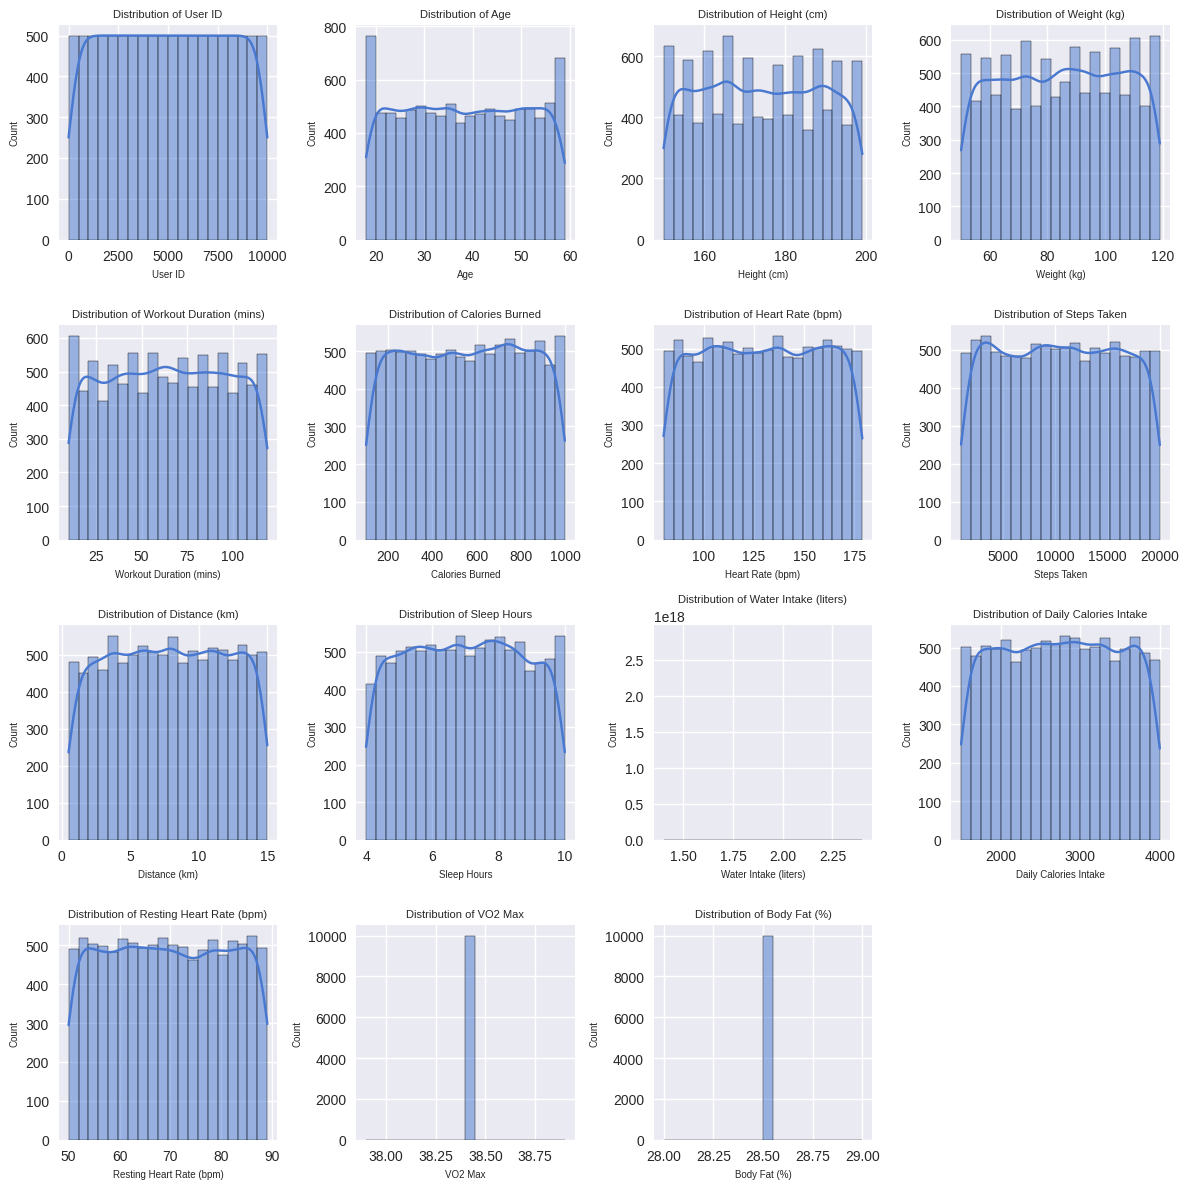

In [ ]:
# 4. Distribusi Variabel
print("\n=== Distribusi Variabel ===")
print("\nNumerical Columns (Skewness and Distribution):")

# Tentukan jumlah kolom dan baris untuk subplot
n_cols = 4  # 4 kolom
n_rows = (len(numerical_cols) + 3) // 4  # Jumlah baris disesuaikan dengan jumlah kolom numerik

# Buat subplot dengan ukuran kecil
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))  # Ukuran diperkecil
axes = axes.flatten()  # Ratakan array axes untuk memudahkan iterasi

# Loop untuk setiap kolom numerik
for idx, col in enumerate(numerical_cols):
    skewness = df[col].skew()
    print(f"{col}: Skewness = {skewness:.3f} (Range: {df[col].min():.2f} to {df[col].max():.2f})")

    # Plot histogram dengan KDE di subplot
    sns.histplot(df[col], bins=20, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}', fontsize=8)  # Ukuran font judul diperkecil
    axes[idx].set_xlabel(col, fontsize=7)  # Ukuran font label sumbu diperkecil
    axes[idx].set_ylabel('Count', fontsize=7)  # Ukuran font label sumbu diperkecil

# Sembunyikan subplot kosong jika ada
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

# mengatur layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()


Gender Proportions:
Gender
Other     0.339
Male      0.337
Female    0.324
Name: count, dtype: float64

Workout Type Proportions:
Workout Type
HIIT        0.173
Strength    0.167
Yoga        0.167
Cycling     0.166
Cardio      0.164
Running     0.164
Name: count, dtype: float64

Workout Intensity Proportions:
Workout Intensity
Low       0.336
Medium    0.332
High      0.332
Name: count, dtype: float64

Mood Before Workout Proportions:
Mood Before Workout
Tired       0.255
Happy       0.251
Neutral     0.251
Stressed    0.242
Name: count, dtype: float64

Mood After Workout Proportions:
Mood After Workout
Neutral      0.336
Energized    0.332
Fatigued     0.332
Name: count, dtype: float64


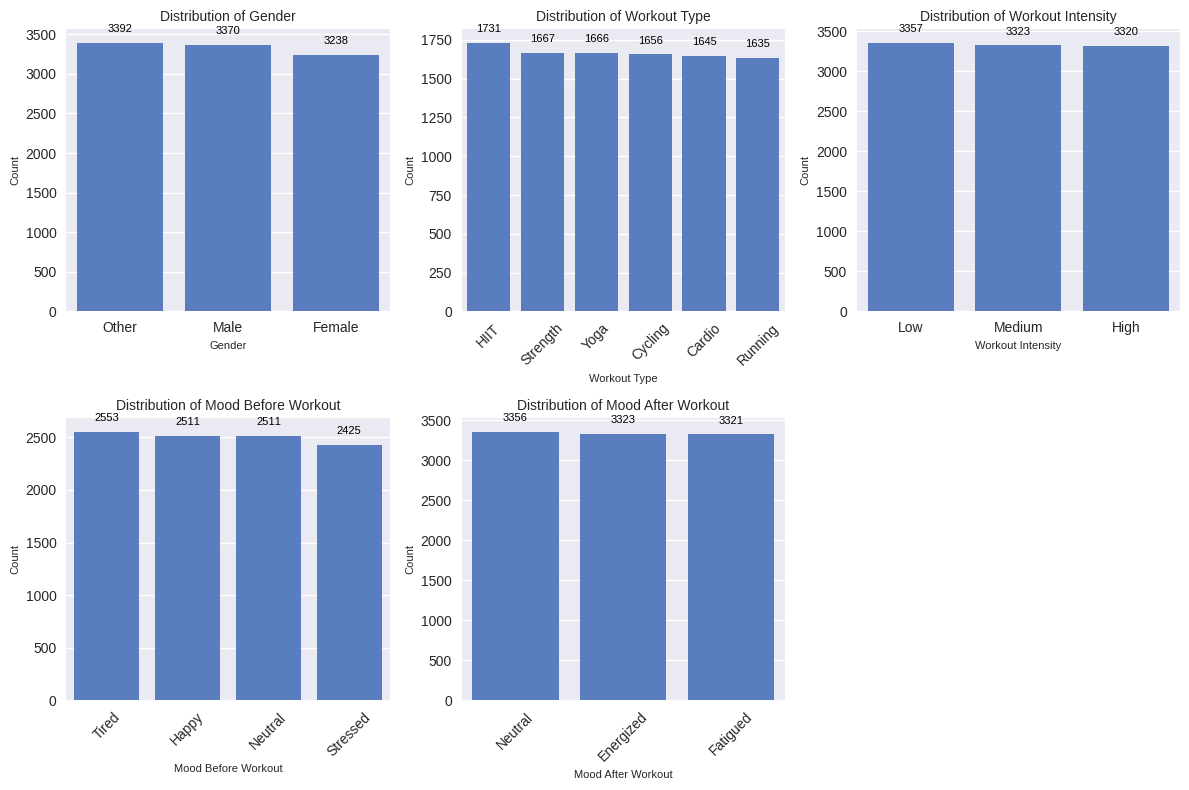

In [ ]:
# Menentukan jumlah kolom dan baris untuk subplot
n_cols = 3  # 3 kolom
n_rows = (len(categorical_cols) + 2) // 3  # Jumlah baris disesuaikan dengan jumlah kolom kategorikal

# Buat subplot dengan ukuran kecil
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))  # Ukuran diperkecil
axes = axes.flatten()  # Ratakan array axes untuk memudahkan iterasi

# Loop untuk setiap kolom kategorikal
for idx, col in enumerate(categorical_cols):
    print(f"\n{col} Proportions:")
    print((df[col].value_counts() / len(df)).round(3))

    # Plot bar plot di subplot
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}', fontsize=10)  # Ukuran font judul
    axes[idx].set_xlabel(col, fontsize=8)  # Ukuran font label sumbu
    axes[idx].set_ylabel('Count', fontsize=8)  # Ukuran font label sumbu

    # Menambahkan angka pada bar
    for p in axes[idx].patches:
        axes[idx].annotate(f'{int(p.get_height())}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center',
                           fontsize=8, color='black',
                           xytext=(0, 10), textcoords='offset points')

    # Rotasi label x untuk kolom tertentu
    if col in ['Workout Type', 'Mood Before Workout', 'Mood After Workout']:
        axes[idx].tick_params(axis='x', rotation=45)


for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)


plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

print("\nDeteksi Outliers menggunakan IQR:")

# Pilih hanya kolom numerik, kecuali User ID
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['User ID'], errors='ignore')

# Hitung Q1, Q3, dan IQR
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Deteksi dan hitung outlier per kolom
outlier_counts = {}

for col in numeric_df.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers = numeric_df[(numeric_df[col] < lower_bound) | (numeric_df[col] > upper_bound)]
    outlier_count = outliers.shape[0]

    if outlier_count > 0:
        outlier_counts[col] = {
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outlier Count': outlier_count
        }

# Cetak hasil
if outlier_counts:
    print("Outliers terdeteksi di kolom-kolom berikut:\n")
    for col, stats in outlier_counts.items():
        print(f"{col}:")
        print(f"  - Batas Bawah  : {stats['Lower Bound']:.2f}")
        print(f"  - Batas Atas   : {stats['Upper Bound']:.2f}")
        print(f"  - Jumlah Outlier: {stats['Outlier Count']}\n")
else:
    print("Tidak ditemukan outliers pada kolom numerik.")



Deteksi Outliers menggunakan IQR:
Tidak ditemukan outliers pada kolom numerik.


In [ ]:
df

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,20,Other,173,59,Yoga,95,230,160,1330,12.83,Medium,10.0,1.9,3718,56,38.4,28.5,Neutral,Neutral
9996,9997,29,Female,171,71,HIIT,83,539,170,3236,9.74,Low,9.4,1.9,2752,72,38.4,28.5,Tired,Fatigued
9997,9998,47,Male,183,75,Running,89,886,114,10532,14.51,Medium,8.1,1.9,1572,73,38.4,28.5,Neutral,Fatigued
9998,9999,52,Male,170,97,HIIT,28,447,102,13690,1.43,Low,7.3,1.9,2172,84,38.4,28.5,Stressed,Fatigued


In [ ]:
# Define functions for calculating Workout Efficiency
def calculate_bmi(height, weight):
    return weight / (height / 100) ** 2

def workout_intensity_score(workout_type):
    workout_types = {
        "Cardio": 1.0,
        "Strength": 1.1,
        "Yoga": 0.9,
        "HIIT": 1.2,
        "Cycling": 1.0,
        "Running": 1.1
    }
    return workout_types.get(workout_type, 1)

def normalize(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value) if max_value > min_value else 0.5

def calculate_workout_efficiency(row, min_calories, max_calories, min_steps, max_steps, min_distance, max_distance):
    bmi = calculate_bmi(row['Height (cm)'], row['Weight (kg)'])
    bmi_score = 1.0 if 18.5 <= bmi <= 25 else 0.9 if 25 < bmi <= 30 else 0.8

    calories_score = normalize(row['Calories Burned'], min_calories, max_calories)
    steps_score = normalize(row['Steps Taken'], min_steps, max_steps)
    distance_score = normalize(row['Distance (km)'], min_distance, max_distance)

    max_heart_rate = 220 - row['Age']
    heart_rate_score = row['Heart Rate (bpm)'] / max_heart_rate

    intensity_score = workout_intensity_score(row['Workout Type'])
    age_modifier = 1.05 if row['Age'] < 30 else 1 if row['Age'] <= 45 else 0.95
    gender_modifier = 1.05 if row['Gender'] == "Male" else 1

    workout_efficiency = (
        (calories_score * 0.3) +
        (steps_score * 0.2) +
        (distance_score * 0.15) +
        (heart_rate_score * 0.1) +
        (intensity_score * 0.1) +
        (bmi_score * 0.05) +
        (age_modifier * 0.025) +
        (gender_modifier * 0.025)
    )

    return workout_efficiency

# Check for expected columns
expected_columns = [
    'User ID', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Workout Type',
    'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)',
    'Workout Intensity', 'Sleep Hours', 'Daily Calories Intake', 'Resting Heart Rate (bpm)'
]

missing_columns = [col for col in expected_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"Missing columns in the dataset: {missing_columns}. Available columns: {df.columns.tolist()}")

# Convert necessary columns to numeric type
numeric_columns = ['Age', 'Height (cm)', 'Weight (kg)', 'Calories Burned', 'Heart Rate (bpm)',
                   'Steps Taken', 'Distance (km)', 'Workout Duration (mins)']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in numeric columns
df.dropna(subset=numeric_columns, inplace=True)

# Calculate min and max values for normalization
min_calories, max_calories = df['Calories Burned'].min(), df['Calories Burned'].max()
min_steps, max_steps = df['Steps Taken'].min(), df['Steps Taken'].max()
min_distance, max_distance = df['Distance (km)'].min(), df['Distance (km)'].max()

# Apply workout efficiency calculation
df['Workout Efficiency'] = df.apply(lambda row: calculate_workout_efficiency(
    row, min_calories, max_calories, min_steps, max_steps, min_distance, max_distance), axis=1)


=== Adjusting Classification Thresholds to Balance Classes ===

=== Distribution of Workout Efficiency Scores ===


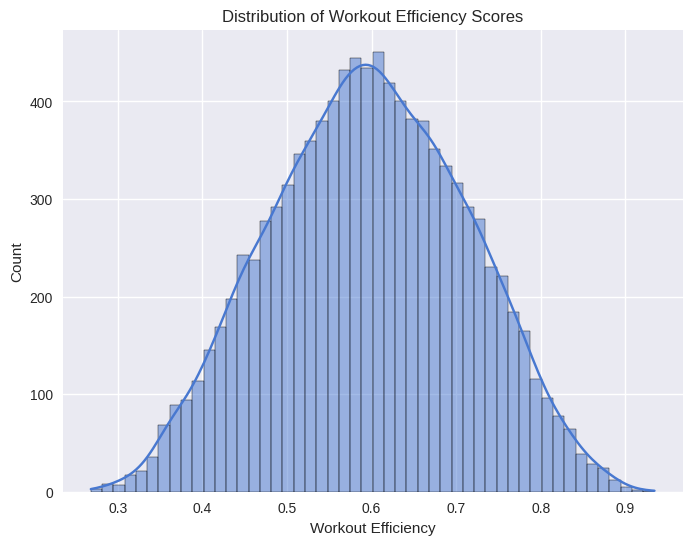

In [ ]:
print("\n=== Adjusting Classification Thresholds to Balance Classes ===")

# Visualize the distribution of Workout Efficiency scores
print("\n=== Distribution of Workout Efficiency Scores ===")
plt.figure(figsize=(8, 6))
sns.histplot(df['Workout Efficiency'], bins=50, kde=True)
plt.title('Distribution of Workout Efficiency Scores')
plt.xlabel('Workout Efficiency')
plt.ylabel('Count')
plt.show()

In [ ]:
percentile_33 = df['Workout Efficiency'].quantile(0.33)  # 33rd percentile
percentile_66 = df['Workout Efficiency'].quantile(0.66)  # 66th percentile
print(f"\nThresholds based on percentiles:")
print(f"33rd Percentile (Low to Moderate): {percentile_33:.4f}")
print(f"66th Percentile (Moderate to High): {percentile_66:.4f}")


Thresholds based on percentiles:
33rd Percentile (Low to Moderate): 0.5440
66th Percentile (Moderate to High): 0.6479


In [ ]:
# New classification function based on percentiles
def classify_workout_efficiency_balanced(efficiency, low_threshold, high_threshold):
    if efficiency < low_threshold:
        return 'Low Efficiency'
    elif low_threshold <= efficiency <= high_threshold:
        return 'Moderate Efficiency'
    else:
        return 'High Efficiency'

# Apply the new classification
df['Efficiency Classification'] = df['Workout Efficiency'].apply(
    lambda x: classify_workout_efficiency_balanced(x, percentile_33, percentile_66))

# Check the distribution of classes after the new classification
dist_counts = df['Efficiency Classification'].value_counts()
dist_proportions = (dist_counts / len(df) * 100).round(2)


=== Distribution of Efficiency Classification After Adjustment ===
Distribution (Counts and Proportions):
High Efficiency: 3400 samples (34.0%)
Moderate Efficiency: 3300 samples (33.0%)
Low Efficiency: 3300 samples (33.0%)


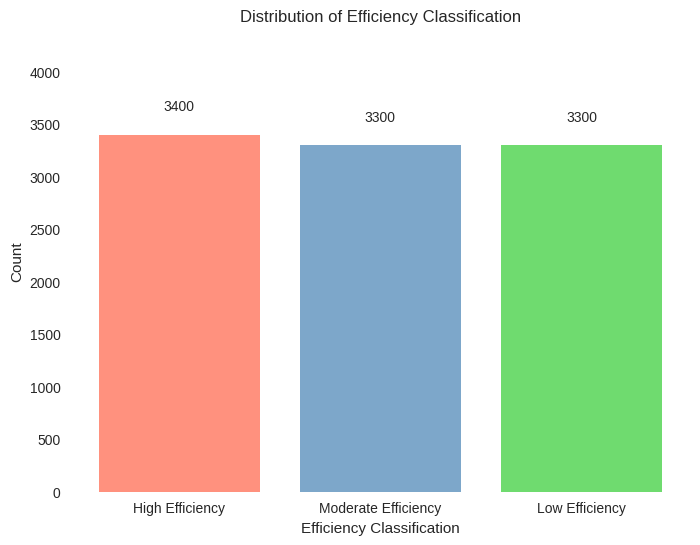

In [ ]:
print("\n=== Distribution of Efficiency Classification After Adjustment ===")
print("Distribution (Counts and Proportions):")
for label, count in dist_counts.items():
    proportion = dist_proportions[label]
    print(f"{label}: {count} samples ({proportion}%)")

# Visualize the distribution
plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')
bars = plt.bar(dist_counts.index, dist_counts.values, color=['#FF6347', '#4682B4', '#32CD32'], alpha=0.7)
plt.title('Distribution of Efficiency Classification')
plt.xlabel('Efficiency Classification')
plt.ylabel('Count')
max_count = dist_counts.max()
plt.ylim(0, max_count + 1000)
for bar, proportion in zip(bars, dist_proportions):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 200, f'{int(yval)}', ha='center', va='bottom', fontsize=10)
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [ ]:
# Display 10 random rows after classification
import random

columns_to_display = [
    'Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Workout Type', 'Workout Duration (mins)',
    'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity', 'Sleep Hours',
    'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'Workout Efficiency', 'Efficiency Classification'
]

In [ ]:
random_indices = random.sample(range(len(df)), 10)
random_data_display = df.iloc[random_indices][columns_to_display]
print("\n10 Random Rows After Classification Labeling (Using random.sample):")
random_data_display


10 Random Rows After Classification Labeling (Using random.sample):


,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),Workout Efficiency,Efficiency Classification
2690,37,Other,194,58,Cycling,41,632,124,15256,7.32,High,8.0,1658,75,0.655921,High Efficiency
8281,22,Female,164,56,Cardio,26,776,121,7948,2.06,Medium,4.8,3468,57,0.577228,Moderate Efficiency
9292,50,Other,155,109,Running,63,645,93,16978,13.99,Low,8.9,2859,63,0.743084,High Efficiency
1911,23,Male,190,59,Cycling,33,641,177,14084,4.25,Medium,8.1,2806,51,0.639416,Moderate Efficiency
9124,19,Other,152,74,Cardio,11,885,127,13988,13.25,Low,4.1,3053,77,0.785019,High Efficiency
360,51,Female,188,82,Yoga,61,487,176,11204,10.24,Medium,8.4,2352,82,0.630216,Moderate Efficiency
4669,51,Male,177,113,Cycling,108,907,163,19409,12.69,High,9.0,2378,53,0.875652,High Efficiency
8307,22,Male,199,105,Cycling,69,605,132,14556,1.70,Medium,5.6,1640,87,0.587811,Moderate Efficiency
4788,45,Other,188,118,Cardio,97,206,147,18578,0.91,Low,6.6,3958,84,0.498665,Low Efficiency
6768,26,Male,155,51,Strength,76,957,83,13898,3.73,Low,6.3,3606,64,0.710464,High Efficiency


# DATA PREPROCESSING, TRANSFORMATION, MODELING

## Preprocessing


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import plot_tree
from sklearn.feature_selection import chi2, SequentialFeatureSelector
import random

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
# Tahap 1: Encoding - Mengubah kolom kategorikal menjadi numerik menggunakan LabelEncoder
nominal_columns = ['Gender', 'Workout Type']

# Kolom kategorikal ordinal – tentukan urutannya secara manual
ordinal_columns = {
    'Efficiency Classification': ['Low Efficiency', 'Moderate Efficiency', 'High Efficiency'],
    'Workout Intensity': ['Low', 'Medium', 'High'],  # High adalah level tertinggi
}

# Label Encoder untuk kolom nominal
label_encoder = LabelEncoder()
for column in nominal_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Manual encoding untuk kolom ordinal
for column, order in ordinal_columns.items():
    mapping = {label: i for i, label in enumerate(order)}
    print(f"Mapping for {column}: {mapping}")  # Debug output untuk memeriksa pemetaan
    df[column] = df[column].map(mapping)

Mapping for Efficiency Classification: {'Low Efficiency': 0, 'Moderate Efficiency': 1, 'High Efficiency': 2}
Mapping for Workout Intensity: {'Low': 0, 'Medium': 1, 'High': 2}


In [ ]:
# Tahap 2: Drop Kolom yang Tidak Relevan
columns_to_drop = ['User ID', 'Water Intake (liters)', 'VO2 Max', 'Body Fat (%)','Mood Before Workout','Mood After Workout']
df = df.drop(columns=columns_to_drop)

## Transformation

In [ ]:
numerical_cols = [
    'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)',
    'Age', 'Height (cm)', 'Weight (kg)', 'Sleep Hours', 'Resting Heart Rate (bpm)', 'Daily Calories Intake', 'Workout Efficiency'
]

In [ ]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df

,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),Workout Efficiency,Efficiency Classification
0,0.050111,1,0.050200,0.698254,1,0.456890,-0.645011,-0.607033,-0.292645,1.591573,2,0.712363,0.622769,-0.733734,-0.193114,1
1,-0.196376,2,-1.196315,1.342171,0,0.268290,0.229836,1.332514,-1.391595,-1.615976,2,0.946465,-0.289271,0.303773,-1.037023,0
2,-1.100162,0,0.396454,-0.936305,2,-1.177644,-0.046431,0.120297,1.538876,-0.130020,2,1.648773,0.855661,0.908986,0.849475,2
3,1.446870,1,-1.404067,0.202933,1,-0.800444,0.460059,-0.399225,0.664674,-0.305545,1,-0.692253,-0.944714,-0.387898,0.489231,2
4,1.200383,2,1.365965,-1.283030,4,-0.266077,-0.545248,1.401784,1.105056,-1.118253,1,0.185632,0.766409,-0.906652,-0.017470,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.510973,2,-0.088302,-1.283030,5,0.959823,-1.235917,1.055436,-1.663370,1.204455,1,1.765824,1.352123,-1.166028,-1.313792,0
9996,-0.771512,0,-0.226803,-0.688645,2,0.582623,-0.050268,1.401784,-1.315950,0.461477,0,1.414670,0.004980,0.217315,-0.183310,1
9997,0.707409,1,0.604206,-0.490516,3,0.771223,1.281188,-0.537764,0.013945,1.608404,1,0.653837,-1.640598,0.303773,1.618844,2
9998,1.118221,1,-0.296054,0.599190,2,-1.146210,-0.403277,-0.953381,0.589576,-1.536628,0,0.185632,-0.803863,1.254822,-0.583986,0


## Modeling without feature selection

### Decision Tree

In [ ]:
# Memisahkan fitur dan target
X = df.drop(columns=['Efficiency Classification'])
y = df['Efficiency Classification']

In [ ]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Define display columns
display_columns = [
    'Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Workout Type', 'Workout Duration (mins)',
    'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity', 'Sleep Hours',
    'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'Workout Efficiency', 'Efficiency Classification'
]

In [ ]:
# df_display = df.copy()
# df_display[numerical_cols] = scaler.inverse_transform(df_display[numerical_cols])
# df_display['Gender'] = label_encoder.inverse_transform(df_display['Gender'].astype(int))
# df_display['Workout Type'] = label_encoder.inverse_transform(df_display['Workout Type'].astype(int))
# df_display['Efficiency Classification'] = df_display['Efficiency Classification'].map(
#     {0: 'Low Efficiency', 1: 'Moderate Efficiency', 2: 'High Efficiency'})
# df_display['Workout Intensity'] = df_display['Workout Intensity'].map(
#     {0: 'Low', 1: 'Medium', 2: 'High'})

In [ ]:
print("\n=== Scenario 1: Modeling Without Feature Selection ===")
print("\nSample DataFrame for Scenario 1:")
df[display_columns].sample(10)


=== Scenario 1: Modeling Without Feature Selection ===

Sample DataFrame for Scenario 1:


,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),Workout Efficiency,Efficiency Classification
7533,0.460922,2,-1.057813,-1.382094,2,-0.548977,0.724816,0.986167,-1.577882,-1.072568,1,-1.687189,-1.138557,-1.425405,-0.306604,1
7252,-1.100162,1,-0.919311,-1.233498,1,-1.491977,-1.631133,0.362740,-0.851143,-0.221389,1,1.531722,0.857055,1.081904,-1.711062,0
8803,1.611195,1,-0.988562,0.004805,1,0.016823,-0.863723,1.574958,-0.200960,0.711541,2,-0.048471,0.940729,-0.387898,-0.251206,1
3576,-0.360701,1,-1.681070,-1.084902,2,-1.554844,0.878298,0.812993,-0.481667,-1.351485,0,1.004991,1.073212,0.736068,0.156940,1
1545,0.953896,1,1.712219,0.995447,4,-1.680577,-0.790819,0.916897,-0.672147,1.687751,1,-0.926356,-0.268353,1.687116,-0.078734,1
916,-1.100162,2,1.504467,-0.242856,3,1.682790,-0.928953,-0.018242,1.132398,-0.440195,0,0.595311,1.433007,-0.906652,-0.241114,1
2078,0.953896,2,1.365965,1.144043,3,0.079690,0.414015,1.471054,0.904187,1.649280,2,0.302683,1.301919,0.736068,1.677772,2
122,-1.346649,2,-0.019051,0.846850,1,1.714223,0.552148,-0.849477,-1.657902,-1.091804,1,-1.043407,1.141545,-0.647275,-1.052838,0
445,1.282546,0,-0.157553,1.292639,3,0.896957,0.832253,0.605184,-0.997511,1.613213,2,1.239093,0.339674,1.600658,0.873594,2
7065,-1.675298,1,1.158213,1.490768,2,-1.146210,0.272044,0.466645,1.185623,-1.495753,0,1.004991,-1.382605,-1.684782,0.349200,1


In [ ]:
print("\nDecision Tree Classifier:")
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train_resampled, y_train_resampled)
y_pred_test_dt = dt_model.predict(X_test)


Decision Tree Classifier:


In [ ]:
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_test_dt))


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       670
           1       1.00      1.00      1.00       647
           2       1.00      1.00      1.00       683

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



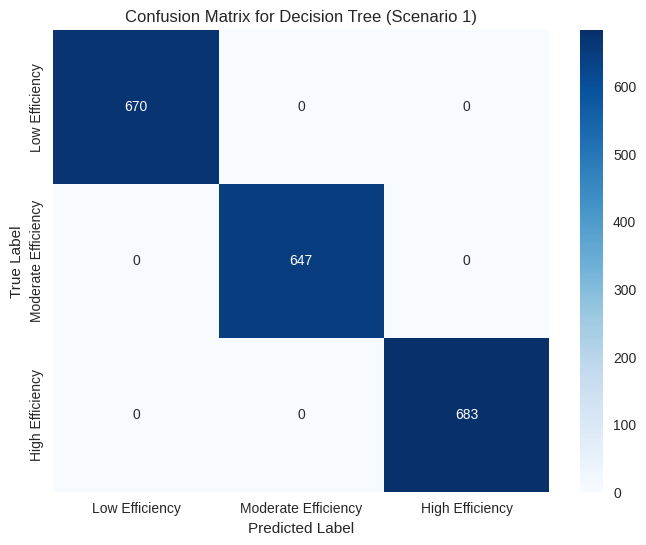

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_test_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Efficiency', 'Moderate Efficiency', 'High Efficiency'],
            yticklabels=['Low Efficiency', 'Moderate Efficiency', 'High Efficiency'])
plt.title('Confusion Matrix for Decision Tree (Scenario 1)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

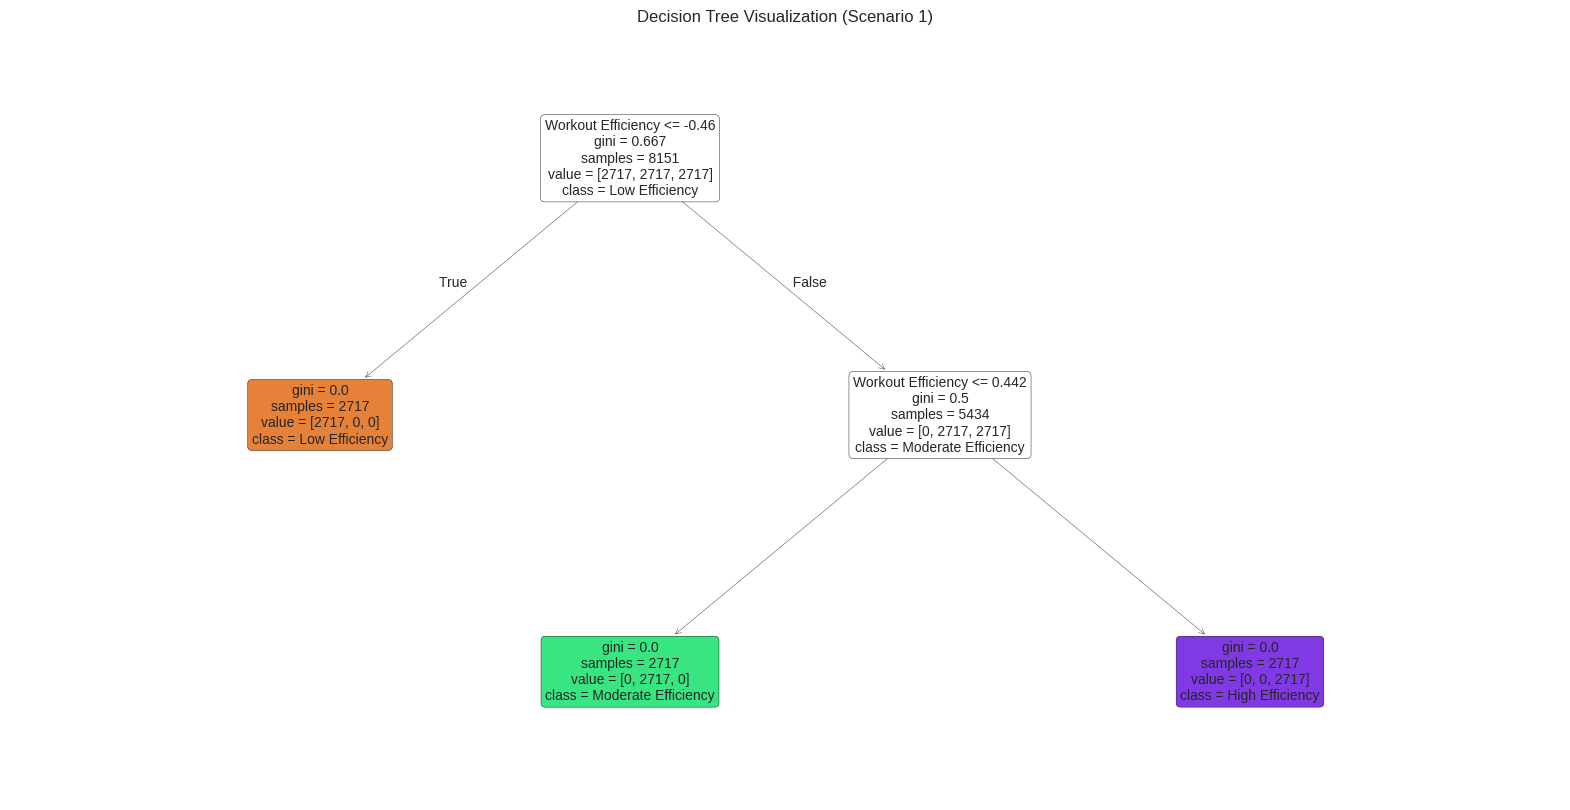

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Low Efficiency', 'Moderate Efficiency', 'High Efficiency'],
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization (Scenario 1)')
plt.show()

In [ ]:
# Define display columns, excluding 'Efficiency Classification' since 'True Label' covers it
display_columns = [
    'Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Workout Type', 'Workout Duration (mins)',
    'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity', 'Sleep Hours',
    'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'Workout Efficiency'
]

# Correct and Incorrect Predictions
results_dt = X_test.copy()
results_dt['True Label'] = y_test.map({0: 'Low Efficiency', 1: 'Moderate Efficiency', 2: 'High Efficiency'})
results_dt['Predicted Label'] = y_pred_test_dt
results_dt['Predicted Label'] = results_dt['Predicted Label'].map(
    {0: 'Low Efficiency', 1: 'Moderate Efficiency', 2: 'High Efficiency'})
results_dt['Correct'] = results_dt['True Label'] == results_dt['Predicted Label']

# Inverse transform for display
results_dt_display = results_dt.copy()
# Sample correct and incorrect predictions
correct_dt = results_dt_display[results_dt_display['Correct']].sample(5)[display_columns + ['True Label', 'Predicted Label']]
incorrect_samples = results_dt_display[~results_dt_display['Correct']]
if len(incorrect_samples) == 0:
    print("\nNo incorrect predictions found for Decision Tree. All test samples were classified correctly.")
    incorrect_dt = pd.DataFrame(columns=display_columns + ['True Label', 'Predicted Label'])  # Empty DataFrame
else:
    sample_size = min(5, len(incorrect_samples))  # Sample up to 5, or fewer if not enough
    incorrect_dt = incorrect_samples.sample(sample_size, replace=True)[display_columns + ['True Label', 'Predicted Label']]



No incorrect predictions found for Decision Tree. All test samples were classified correctly.


In [ ]:
correct_dt

,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),Workout Efficiency,True Label,Predicted Label
3122,1.693357,0,1.227464,-1.233498,2,-0.171777,1.315721,-0.710938,1.339282,1.081827,1,-1.687189,1.135967,0.044397,2.117579,High Efficiency,High Efficiency
7888,-0.525025,2,1.365965,-0.589581,1,0.771223,-1.017205,-1.334364,1.707482,1.447305,1,0.595311,0.424742,1.514199,0.433828,Moderate Efficiency,Moderate Efficiency
8264,-1.510973,0,1.158213,1.144043,2,1.022690,-0.967323,0.535914,-0.511925,-1.409192,1,0.419734,0.936545,0.995445,-1.357957,Low Efficiency,Low Efficiency
8305,-1.675298,1,0.188702,0.747786,4,0.205423,-0.192239,0.362740,0.876845,-0.404128,0,-0.750779,0.321545,1.514199,0.151861,Moderate Efficiency,Moderate Efficiency
6974,1.200383,2,-1.057813,1.490768,1,-1.083344,-0.449322,0.951532,1.630926,1.240522,1,0.595311,-1.473251,-0.042062,1.045237,High Efficiency,High Efficiency


In [ ]:
incorrect_dt

,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),Workout Efficiency,True Label,Predicted Label


<ipython-input-621-172ce839fad1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_dt, incorrect_count_dt], palette=['#32CD32', '#FF6347'])


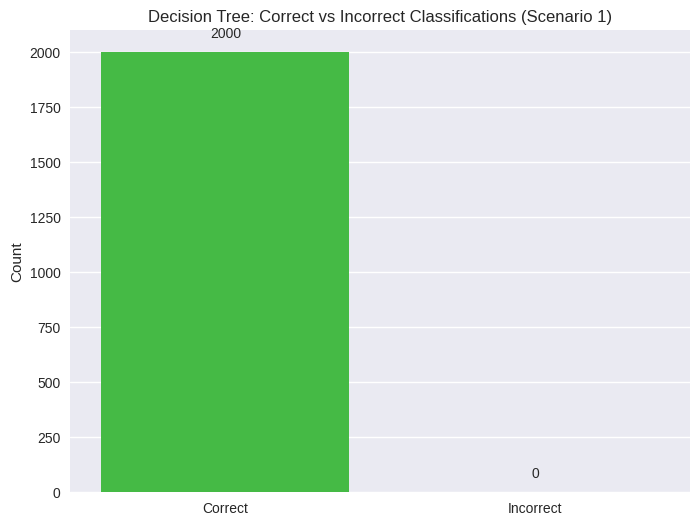

In [ ]:
correct_count_dt = results_dt['Correct'].sum()
incorrect_count_dt = len(results_dt) - correct_count_dt

plt.figure(figsize=(8, 6))
sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_dt, incorrect_count_dt], palette=['#32CD32', '#FF6347'])
plt.title('Decision Tree: Correct vs Incorrect Classifications (Scenario 1)')
plt.ylabel('Count')
for i, count in enumerate([correct_count_dt, incorrect_count_dt]):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
plt.show()

### NB

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)
y_pred_test_nb = nb_model.predict(X_test)

In [ ]:
print("\nClassification Report for Naive Bayes (Scenario 1):")
print(classification_report(y_test, y_pred_test_nb))


Classification Report for Naive Bayes (Scenario 1):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       670
           1       0.94      0.98      0.96       647
           2       0.99      0.97      0.98       683

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



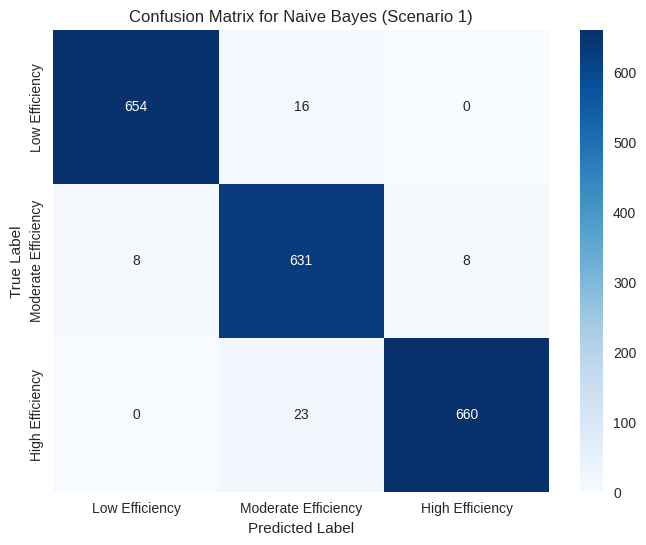

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_test_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Efficiency', 'Moderate Efficiency', 'High Efficiency'],
            yticklabels=['Low Efficiency', 'Moderate Efficiency', 'High Efficiency'])
plt.title('Confusion Matrix for Naive Bayes (Scenario 1)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
results_nb = X_test.copy()
results_nb['True Label'] = y_test.map({0: 'Low Efficiency', 1: 'Moderate Efficiency', 2: 'High Efficiency'})
results_nb['Predicted Label'] = y_pred_test_nb
results_nb['Predicted Label'] = results_nb['Predicted Label'].map(
    {0: 'Low Efficiency', 1: 'Moderate Efficiency', 2: 'High Efficiency'})
results_nb['Correct'] = results_nb['True Label'] == results_nb['Predicted Label']

# Tambahkan probabilitas prediksi untuk Naive Bayes
y_pred_prob_nb = nb_model.predict_proba(X_test)

In [ ]:
# Tambahkan probabilitas ke results_nb_display
results_nb_display = results_nb.copy()
results_nb_display['Prob_Low'] = y_pred_prob_nb[:, 0]
results_nb_display['Prob_Moderate'] = y_pred_prob_nb[:, 1]
results_nb_display['Prob_High'] = y_pred_prob_nb[:, 2]



In [ ]:
correct_nb = results_nb_display[results_nb_display['Correct']].sample(5)[display_columns + ['True Label', 'Predicted Label', 'Prob_Low', 'Prob_Moderate', 'Prob_High']]

# Sample incorrect predictions dengan probabilitas
incorrect_samples_nb = results_nb_display[~results_nb_display['Correct']]
if len(incorrect_samples_nb) == 0:
    print("\nNo incorrect predictions found for Naive Bayes. All test samples were classified correctly.")
    incorrect_nb = pd.DataFrame(columns=display_columns + ['True Label', 'Predicted Label', 'Prob_Low', 'Prob_Moderate', 'Prob_High'])
else:
    sample_size_nb = min(5, len(incorrect_samples_nb))
    incorrect_nb = incorrect_samples_nb.sample(sample_size_nb, replace=True)[display_columns + ['True Label', 'Predicted Label', 'Prob_Low', 'Prob_Moderate', 'Prob_High']]

In [ ]:
correct_nb

,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),Workout Efficiency,True Label,Predicted Label,Prob_Low,Prob_Moderate,Prob_High
4099,-1.100162,2,-0.296054,0.202933,2,-1.303377,0.279718,-1.334364,1.397064,0.442241,1,1.707299,0.336885,1.427740,0.964561,High Efficiency,High Efficiency,2.290169e-06,6.388440e-04,0.999359
3210,-1.100162,1,-0.850061,-0.242856,5,1.557057,-0.491529,-1.161190,0.140445,1.093850,2,1.239093,1.134572,0.995445,-0.231747,Moderate Efficiency,Moderate Efficiency,1.021248e-01,8.956624e-01,0.002213
4802,0.132273,2,0.604206,0.500126,5,-0.674710,-1.431606,-1.265094,1.372275,1.069805,1,-1.628664,0.554436,0.822527,-0.290014,Moderate Efficiency,Moderate Efficiency,1.408327e-01,8.589930e-01,0.000174
866,0.543085,1,1.435216,-0.391452,4,1.619923,1.695589,-1.438268,1.048003,-1.608762,1,1.590247,-0.559816,-0.128521,1.123903,High Efficiency,High Efficiency,8.880071e-09,3.056833e-05,0.999969
3470,-0.196376,2,-0.503807,0.995447,1,1.148423,1.442344,-1.022651,1.416750,0.035888,2,-1.043407,1.173620,0.476691,1.582654,High Efficiency,High Efficiency,4.330625e-11,1.491388e-09,1.000000


In [ ]:
incorrect_nb

,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),Workout Efficiency,True Label,Predicted Label,Prob_Low,Prob_Moderate,Prob_High
3184,0.214435,1,-1.334816,0.945915,0,0.205423,0.287392,0.812993,-0.231036,-1.666469,1,-1.101933,-0.752265,0.736068,-0.470289,Low Efficiency,Moderate Efficiency,0.305287,0.692837,0.001876
8636,0.460922,2,1.227464,-1.679287,3,-0.580410,-0.453159,-1.126555,1.705660,0.276334,0,-0.809304,-0.240462,0.390232,0.479660,High Efficiency,Moderate Efficiency,0.001511,0.607462,0.391028
908,-0.607188,1,1.227464,-0.837241,2,-1.429111,-1.051738,-0.087512,1.558197,1.067401,0,0.595311,-0.211176,-0.214980,0.451811,High Efficiency,Moderate Efficiency,0.003555,0.907054,0.089391
5833,-0.114214,1,-1.196315,-0.688645,2,-1.303377,0.371807,-0.503129,-0.824713,-1.171151,1,0.770888,-0.010360,0.563150,-0.498671,Low Efficiency,Moderate Efficiency,0.399922,0.598450,0.001627
6240,-0.196376,1,-0.919311,-0.639113,0,-1.366244,0.751675,-1.646077,-0.239056,0.605745,1,-1.687189,-1.575054,-1.425405,0.413160,Moderate Efficiency,High Efficiency,0.000353,0.474855,0.524793


<ipython-input-629-2ae1954dcc99>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_nb, incorrect_count_nb], palette=['#32CD32', '#FF6347'])


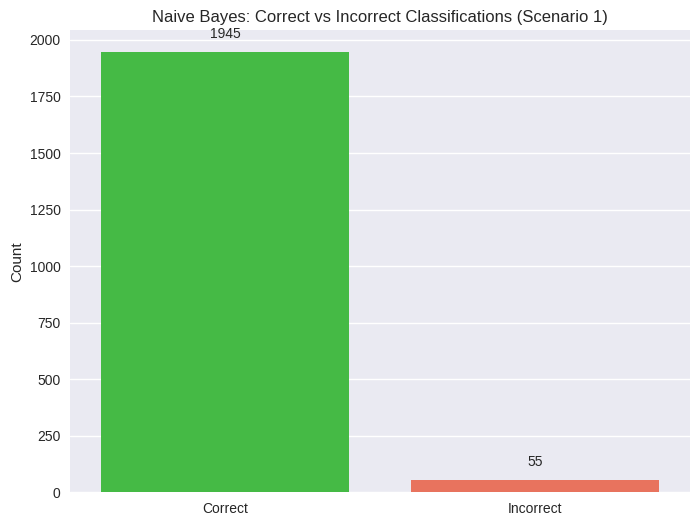

In [ ]:
correct_count_nb = results_nb['Correct'].sum()
incorrect_count_nb = len(results_nb) - correct_count_nb

plt.figure(figsize=(8, 6))
sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_nb, incorrect_count_nb], palette=['#32CD32', '#FF6347'])
plt.title('Naive Bayes: Correct vs Incorrect Classifications (Scenario 1)')
plt.ylabel('Count')
for i, count in enumerate([correct_count_nb, incorrect_count_nb]):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
plt.show()

## Modeling with Chi-Square

In [ ]:
print("\n=== Scenario 2: Feature Selection with Chi-square ===")

# Use original (unscaled) data for Chi-square
X_chi = df.drop(columns=['Efficiency Classification']).copy()
y_chi = df['Efficiency Classification']


=== Scenario 2: Feature Selection with Chi-square ===


In [ ]:
for col in X_chi.columns:
    if X_chi[col].min() < 0:
        X_chi[col] = X_chi[col] - X_chi[col].min()

# Compute Chi-square scores
chi_scores, p_values = chi2(X_chi, y_chi)
chi_scores_df = pd.DataFrame({'Feature': X_chi.columns, 'Chi2 Score': chi_scores, 'P-value': p_values})
chi_scores_df = chi_scores_df.sort_values(by='Chi2 Score', ascending=False)

print("\nChi-square Scores for All Features:")
chi_scores_df.round(4)


Chi-square Scores for All Features:


,Feature,Chi2 Score,P-value
6,Calories Burned,3004.0476,0.0000
14,Workout Efficiency,2893.7685,0.0000
8,Steps Taken,1108.6494,0.0000
9,Distance (km),596.9705,0.0000
7,Heart Rate (bpm),75.4559,0.0000
0,Age,7.2163,0.0271
5,Workout Duration (mins),4.9638,0.0836
3,Weight (kg),4.1453,0.1259
2,Height (cm),3.4640,0.1769
1,Gender,2.5946,0.2733


In [ ]:
selected_features_chi = chi_scores_df.head(10)['Feature'].tolist()
print("\nSelected Features (Chi-square):")
selected_features_chi


Selected Features (Chi-square):


['Calories Burned',
 'Workout Efficiency',
 'Steps Taken',
 'Distance (km)',
 'Heart Rate (bpm)',
 'Age',
 'Workout Duration (mins)',
 'Weight (kg)',
 'Height (cm)',
 'Gender']

In [ ]:
X_chi_selected = X_chi[selected_features_chi]
X_train_chi, X_test_chi, y_train_chi, y_test_chi = train_test_split(
    X_chi_selected, y_chi, test_size=0.2, random_state=42)


In [ ]:
# X_train_chi_no_norm = X_train_chi.copy()
# X_test_chi_no_norm = X_test_chi.copy()

In [ ]:
numerical_chi_cols = list(set(numerical_cols).intersection(selected_features_chi))
if numerical_chi_cols:
    scaler_chi = StandardScaler()
    X_chi_selected[numerical_chi_cols] = scaler_chi.fit_transform(X_chi_selected[numerical_chi_cols])
    X_train_chi[numerical_chi_cols] = scaler_chi.transform(X_train_chi[numerical_chi_cols])
    X_test_chi[numerical_chi_cols] = scaler_chi.transform(X_test_chi[numerical_chi_cols])

<ipython-input-59-8127669d53c6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_chi_selected[numerical_chi_cols] = scaler_chi.fit_transform(X_chi_selected[numerical_chi_cols])


In [ ]:
X_train_chi_resampled, y_train_chi_resampled = smote.fit_resample(X_train_chi, y_train_chi)
# X_train_chi_resampled_no_norm, y_train_chi_resampled_no_norm = smote.fit_resample(X_train_chi_no_norm, y_train_chi)

In [ ]:
print("\nSample DataFrame for Scenario 2 (Chi-square Features):")
df[display_columns + ['Efficiency Classification']].sample(10, random_state=42)


Sample DataFrame for Scenario 2 (Chi-square Features):


,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),Workout Efficiency,Efficiency Classification
6252,-0.114214,2,0.534956,-0.242856,3,1.211290,-1.209058,-0.953381,1.045452,1.517035,0,1.063517,0.912837,-0.906652,0.133563,1
4684,-1.100162,0,-0.919311,-0.639113,2,-0.769010,-1.423932,-1.161190,-0.739225,0.341254,0,-1.687189,-1.064646,-1.425405,-1.364879,0
1731,0.214435,1,0.465705,0.103869,0,1.305590,-0.353395,-0.226051,0.500443,-1.748221,1,0.478260,-1.371448,0.476691,-0.719956,0
4742,-0.607188,2,0.673457,1.144043,4,0.676923,-0.825353,-1.646077,1.202210,0.911111,0,-1.570138,-0.067537,-1.598323,0.081506,1
4521,-0.442863,2,0.811959,0.103869,0,0.708357,-0.545248,1.540323,0.439015,-0.459431,0,0.302683,-0.908455,-0.820193,-0.213848,1
6340,0.296598,2,-0.157553,0.698254,1,0.142556,1.430833,-0.537764,0.019413,1.081827,2,0.010055,0.130490,0.044397,1.348195,2
576,-1.675298,0,-0.434556,0.401061,0,-1.554844,-1.155339,1.678862,-1.107607,0.759630,2,1.765824,0.802667,-0.820193,-1.069961,0
5202,-0.525025,0,-0.157553,-0.242856,3,0.173990,-0.679545,-0.503129,0.353527,0.733181,1,1.414670,1.668688,-0.301439,-0.102592,1
6363,-0.935837,0,1.365965,1.441236,1,-0.863310,1.461529,-0.018242,0.040740,0.831764,0,1.648773,1.094130,1.687116,1.323775,2
439,-1.510973,2,-0.434556,-1.530691,5,1.431323,0.133910,0.224201,-1.047455,0.389343,1,-0.926356,1.332599,0.476691,-0.379370,1


### Decision Tree

In [ ]:
print("\nDecision Tree Classifier (Chi-square):")
dt_model_chi = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model_chi.fit(X_train_chi_resampled, y_train_chi_resampled)
y_pred_test_dt_chi = dt_model_chi.predict(X_test_chi)


Decision Tree Classifier (Chi-square):


In [ ]:
print("\nClassification Report for Decision Tree (Chi-square):")
print(classification_report(y_test_chi, y_pred_test_dt_chi))


Classification Report for Decision Tree (Chi-square):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       670
           1       1.00      1.00      1.00       647
           2       1.00      1.00      1.00       683

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



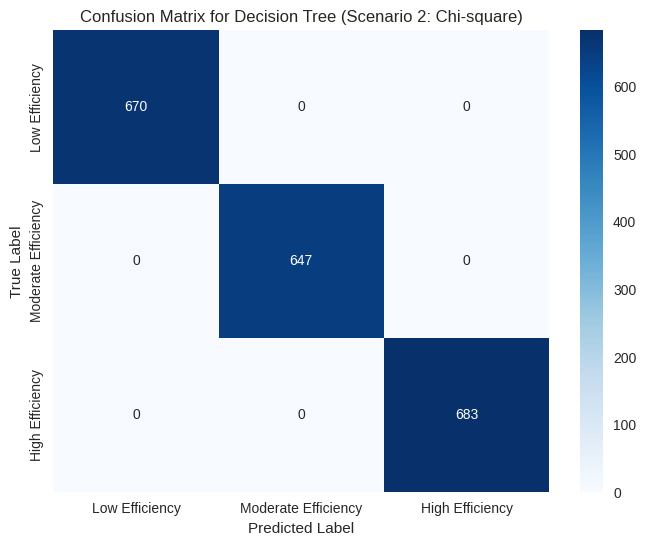

In [ ]:
cm_dt_chi = confusion_matrix(y_test_chi, y_pred_test_dt_chi)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_chi, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Efficiency', 'Moderate Efficiency', 'High Efficiency'],
            yticklabels=['Low Efficiency', 'Moderate Efficiency', 'High Efficiency'])
plt.title('Confusion Matrix for Decision Tree (Scenario 2: Chi-square)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

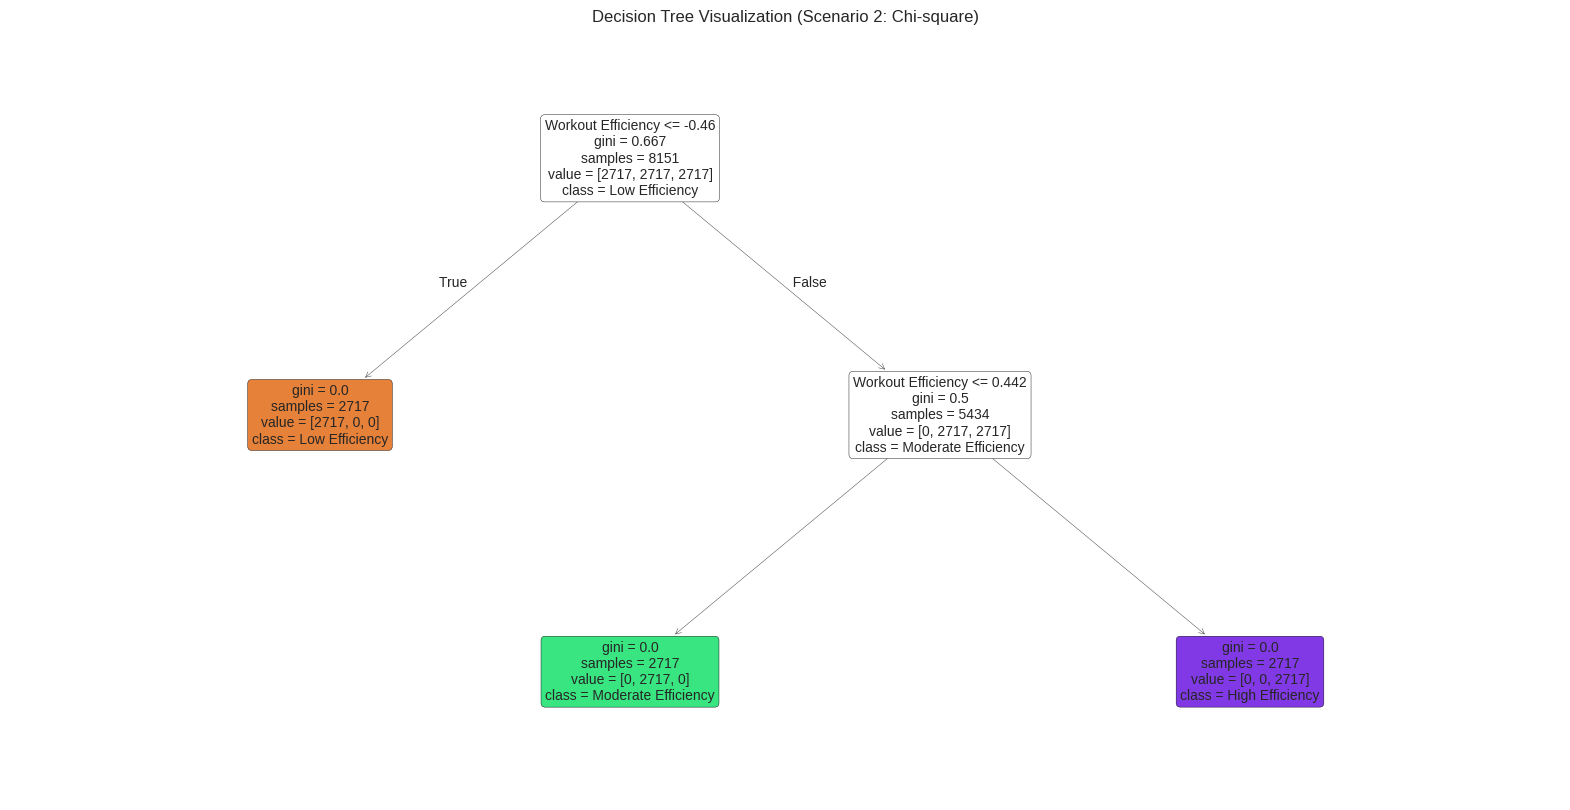

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model_chi, feature_names=X_chi_selected.columns,
          class_names=['Low Efficiency', 'Moderate Efficiency', 'High Efficiency'],
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization (Scenario 2: Chi-square)')
plt.show()

In [ ]:
feature_importances_chi = pd.DataFrame({
    'Feature': X_chi_selected.columns,
    'Importance': dt_model_chi.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances from Decision Tree (Chi-square):")
feature_importances_chi.round(4)


Feature Importances from Decision Tree (Chi-square):


,Feature,Importance
1,Workout Efficiency,1.0
0,Calories Burned,0.0
2,Steps Taken,0.0
3,Distance (km),0.0
4,Heart Rate (bpm),0.0
5,Age,0.0
6,Workout Duration (mins),0.0
7,Weight (kg),0.0
8,Height (cm),0.0
9,Gender,0.0


In [ ]:
# Correct and Incorrect Predictions
results_dt_chi = X_test_chi.copy()
results_dt_chi['True Label'] = y_test_chi.map({0: 'Low Efficiency', 1: 'Moderate Efficiency', 2: 'High Efficiency'})
results_dt_chi['Predicted Label'] = y_pred_test_dt_chi
results_dt_chi['Predicted Label'] = results_dt_chi['Predicted Label'].map(
    {0: 'Low Efficiency', 1: 'Moderate Efficiency', 2: 'High Efficiency'})
results_dt_chi['Correct'] = results_dt_chi['True Label'] == results_dt_chi['Predicted Label']

# Inverse transform for display
results_dt_chi_display = results_dt_chi.copy()


# Sample correct predictions
correct_dt_chi = results_dt_chi_display[results_dt_chi_display['Correct']].sample(5)[list(set(display_columns).intersection(selected_features_chi)) + ['True Label', 'Predicted Label']]

# Sample incorrect predictions with error handling
incorrect_samples_chi_dt = results_dt_chi_display[~results_dt_chi_display['Correct']]
if len(incorrect_samples_chi_dt) == 0:
    print("\nNo incorrect predictions found for Decision Tree (Chi-square). All test samples were classified correctly.")
    incorrect_dt_chi = pd.DataFrame(columns=list(set(display_columns).intersection(selected_features_chi)) + ['True Label', 'Predicted Label'])
else:
    sample_size_chi_dt = min(5, len(incorrect_samples_chi_dt))
    incorrect_dt_chi = incorrect_samples_chi_dt.sample(sample_size_chi_dt, replace=True)[list(set(display_columns).intersection(selected_features_chi)) + ['True Label', 'Predicted Label']]


No incorrect predictions found for Decision Tree (Chi-square). All test samples were classified correctly.


In [ ]:
correct_dt_chi

,Heart Rate (bpm),Age,Gender,Weight (kg),Calories Burned,Workout Duration (mins),Height (cm),Distance (km),Workout Efficiency,Steps Taken,True Label,Predicted Label
5492,-0.953381,-1.510973,1,0.301997,0.621215,1.651357,1.019711,0.026270,-0.451043,-1.467604,Moderate Efficiency,Moderate Efficiency
7791,-0.849477,-1.017999,2,-0.738177,1.012594,0.645490,-1.334816,-1.527011,-0.052647,-0.310873,Moderate Efficiency,Moderate Efficiency
7826,0.328106,0.625247,2,-0.886773,-1.550555,-0.957610,-0.780810,-0.957154,-2.304375,-1.596292,Low Efficiency,Low Efficiency
711,0.224201,0.214435,0,-1.728819,1.031780,0.236857,0.950460,0.083977,1.064505,0.764380,High Efficiency,High Efficiency
9786,-1.091920,-1.264486,1,-0.936305,1.438507,-0.077477,0.396454,-1.731390,0.918776,1.105056,High Efficiency,High Efficiency


In [ ]:
incorrect_dt_chi

,Heart Rate (bpm),Age,Gender,Weight (kg),Calories Burned,Workout Duration (mins),Height (cm),Distance (km),Workout Efficiency,Steps Taken,True Label,Predicted Label


<ipython-input-688-983664782adc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_dt_chi, incorrect_count_dt_chi], palette=['#32CD32', '#FF6347'])


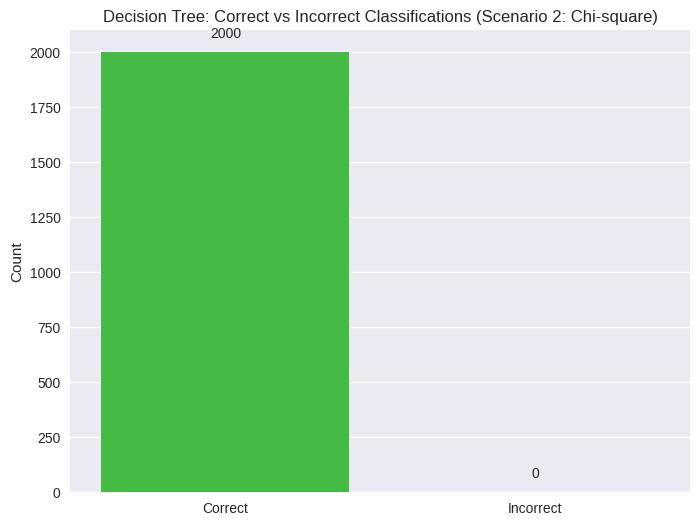

In [ ]:
correct_count_dt_chi = results_dt_chi['Correct'].sum()
incorrect_count_dt_chi = len(results_dt_chi) - correct_count_dt_chi

plt.figure(figsize=(8, 6))
sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_dt_chi, incorrect_count_dt_chi], palette=['#32CD32', '#FF6347'])
plt.title('Decision Tree: Correct vs Incorrect Classifications (Scenario 2: Chi-square)')
plt.ylabel('Count')
for i, count in enumerate([correct_count_dt_chi, incorrect_count_dt_chi]):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
plt.show()

### NB

In [ ]:
print("\nNaive Bayes Classifier (Chi-square):")
nb_model_chi = GaussianNB()
nb_model_chi.fit(X_train_chi_resampled, y_train_chi_resampled)
y_pred_test_nb_chi = nb_model_chi.predict(X_test_chi)


Naive Bayes Classifier (Chi-square):


In [ ]:
print("\nClassification Report for Naive Bayes (Chi-square):")
print(classification_report(y_test_chi, y_pred_test_nb_chi))


Classification Report for Naive Bayes (Chi-square):
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       670
           1       0.94      0.97      0.96       647
           2       0.99      0.97      0.98       683

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



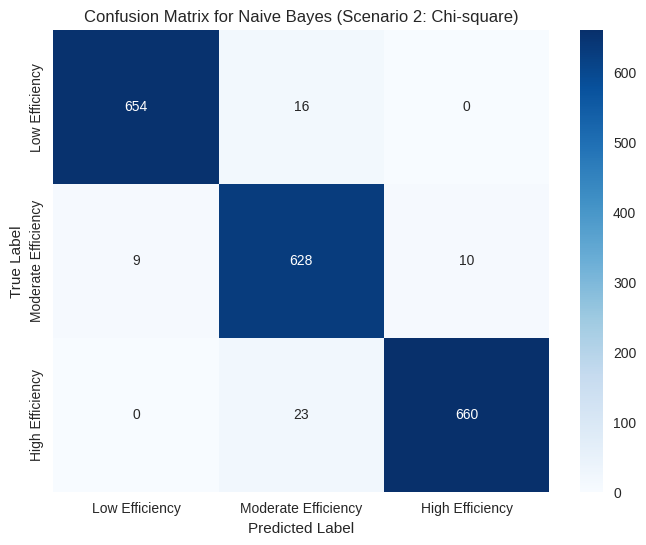

In [ ]:
cm_nb_chi = confusion_matrix(y_test_chi, y_pred_test_nb_chi)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_chi, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Efficiency', 'Moderate Efficiency', 'High Efficiency'],
            yticklabels=['Low Efficiency', 'Moderate Efficiency', 'High Efficiency'])
plt.title('Confusion Matrix for Naive Bayes (Scenario 2: Chi-square)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Correct and Incorrect Predictions for Naive Bayes
results_nb_chi = X_test_chi.copy()
results_nb_chi['True Label'] = y_test_chi.map({0: 'Low Efficiency', 1: 'Moderate Efficiency', 2: 'High Efficiency'})
results_nb_chi['Predicted Label'] = y_pred_test_nb_chi
results_nb_chi['Predicted Label'] = results_nb_chi['Predicted Label'].map(
    {0: 'Low Efficiency', 1: 'Moderate Efficiency', 2: 'High Efficiency'})
results_nb_chi['Correct'] = results_nb_chi['True Label'] == results_nb_chi['Predicted Label']

# Tambahkan probabilitas prediksi untuk Naive Bayes
y_pred_prob_nb_chi = nb_model_chi.predict_proba(X_test_chi)

# Tambahkan probabilitas ke results_nb_chi_display
results_nb_chi_display = results_nb_chi.copy()
results_nb_chi_display['Prob_Low'] = y_pred_prob_nb_chi[:, 0]
results_nb_chi_display['Prob_Moderate'] = y_pred_prob_nb_chi[:, 1]
results_nb_chi_display['Prob_High'] = y_pred_prob_nb_chi[:, 2]



# Sample correct predictions dengan probabilitas
correct_nb_chi = results_nb_chi_display[results_nb_chi_display['Correct']].sample(5)[list(set(display_columns).intersection(selected_features_chi)) + ['True Label', 'Predicted Label', 'Prob_Low', 'Prob_Moderate', 'Prob_High']]

# Sample incorrect predictions dengan probabilitas
incorrect_samples_chi_nb = results_nb_chi_display[~results_nb_chi_display['Correct']]
if len(incorrect_samples_chi_nb) == 0:
    print("\nNo incorrect predictions found for Naive Bayes (Chi-square, Top 10 Features). All test samples were classified correctly.")
    incorrect_nb_chi = pd.DataFrame(columns=list(set(display_columns).intersection(selected_features_chi)) + ['True Label', 'Predicted Label', 'Prob_Low', 'Prob_Moderate', 'Prob_High'])
else:
    sample_size_chi_nb = min(5, len(incorrect_samples_chi_nb))
    incorrect_nb_chi = incorrect_samples_chi_nb.sample(sample_size_chi_nb,  replace=True)[list(set(display_columns).intersection(selected_features_chi)) + ['True Label', 'Predicted Label', 'Prob_Low', 'Prob_Moderate', 'Prob_High']]

In [ ]:
correct_nb_chi

,Heart Rate (bpm),Age,Gender,Weight (kg),Calories Burned,Workout Duration (mins),Height (cm),Distance (km),Workout Efficiency,Steps Taken,True Label,Predicted Label,Prob_Low,Prob_Moderate,Prob_High
6149,-1.576807,-0.853675,1,-1.530691,0.237510,0.173990,-0.365305,1.173197,-0.018329,-0.842211,Moderate Efficiency,Moderate Efficiency,0.010100,0.975186,1.471345e-02
8720,-1.542173,0.953896,0,-0.589581,-1.688689,1.054123,0.465705,1.543484,-1.097655,-0.240332,Low Efficiency,Low Efficiency,0.999925,0.000075,1.679291e-08
3960,-0.018242,-1.593136,1,1.144043,-0.691056,0.739790,-0.434556,0.629789,-0.814383,-0.980560,Low Efficiency,Low Efficiency,0.993405,0.006591,4.586589e-06
856,0.293471,0.132273,2,-1.580223,0.444711,0.582623,0.881210,-1.529415,-0.997035,-1.273297,Low Efficiency,Low Efficiency,0.997854,0.002128,1.846293e-05
3582,-0.745573,-1.510973,0,-0.837241,0.479244,-0.800444,-1.473318,-1.421214,0.471910,1.634936,High Efficiency,High Efficiency,0.000247,0.454877,5.448758e-01


In [ ]:
incorrect_nb_chi

,Heart Rate (bpm),Age,Gender,Weight (kg),Calories Burned,Workout Duration (mins),Height (cm),Distance (km),Workout Efficiency,Steps Taken,True Label,Predicted Label,Prob_Low,Prob_Moderate,Prob_High
8636,-1.126555,0.460922,2,-1.679287,-0.453159,-0.580410,1.227464,0.276334,0.479660,1.705660,High Efficiency,Moderate Efficiency,0.001588,0.623039,0.375373
9920,-0.364590,1.529033,0,-0.540049,-1.477651,-0.360377,-0.988562,-0.466644,-0.474293,1.697639,Low Efficiency,Moderate Efficiency,0.460429,0.539526,0.000045
8944,-1.230460,0.214435,1,0.054337,0.674934,0.016823,-0.503807,0.071955,0.429194,-0.091229,Moderate Efficiency,High Efficiency,0.000504,0.460189,0.539306
9063,0.224201,-1.428811,1,-0.341920,-1.013368,1.022690,-0.019051,1.593977,0.498470,1.073158,High Efficiency,Moderate Efficiency,0.004682,0.872204,0.123114
8081,1.678862,0.378760,0,1.044979,-1.469977,-1.554844,-0.434556,1.673324,0.555025,1.732637,High Efficiency,Moderate Efficiency,0.001987,0.935155,0.062858


<ipython-input-697-3c11ec32daa5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_nb_chi, incorrect_count_nb_chi], palette=['#32CD32', '#FF6347'])


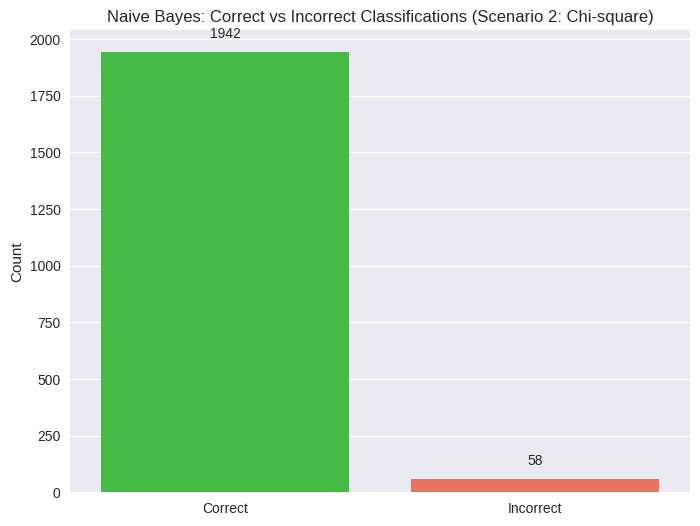

In [ ]:
correct_count_nb_chi = results_nb_chi['Correct'].sum()
incorrect_count_nb_chi = len(results_nb_chi) - correct_count_nb_chi

plt.figure(figsize=(8, 6))
sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_nb_chi, incorrect_count_nb_chi], palette=['#32CD32', '#FF6347'])
plt.title('Naive Bayes: Correct vs Incorrect Classifications (Scenario 2: Chi-square)')
plt.ylabel('Count')
for i, count in enumerate([correct_count_nb_chi, incorrect_count_nb_chi]):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
plt.show()

## Modeling with SFS

### Decision Tree

In [ ]:
print("\n=== Scenario 3: Feature Selection with SFS ===")

# SFS
sfs = SequentialFeatureSelector(
    DecisionTreeClassifier(random_state=42), n_features_to_select=10, direction='forward', cv=5)
sfs.fit(X_train, y_train)
selected_features_sfs = X_train.columns[sfs.get_support()].tolist()


=== Scenario 3: Feature Selection with SFS ===


In [ ]:
selected_features_sfs

['Age',
 'Gender',
 'Height (cm)',
 'Weight (kg)',
 'Workout Type',
 'Workout Duration (mins)',
 'Calories Burned',
 'Heart Rate (bpm)',
 'Steps Taken',
 'Workout Efficiency']

In [ ]:
X_sfs = X[selected_features_sfs]
X_train_sfs, X_test_sfs, y_train_sfs, y_test_sfs = train_test_split(
    X_sfs, y, test_size=0.2, random_state=42)

In [ ]:
numerical_sfs_cols = list(set(numerical_cols).intersection(selected_features_sfs))
if numerical_sfs_cols:
    scaler_sfs = StandardScaler()
    X_sfs[numerical_sfs_cols] = scaler_sfs.fit_transform(X_sfs[numerical_sfs_cols])
    X_train_sfs[numerical_sfs_cols] = scaler_sfs.transform(X_train_sfs[numerical_sfs_cols])
    X_test_sfs[numerical_sfs_cols] = scaler_sfs.transform(X_test_sfs[numerical_sfs_cols])

<ipython-input-701-35e1550fb5a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_sfs[numerical_sfs_cols] = scaler_sfs.fit_transform(X_sfs[numerical_sfs_cols])


In [ ]:
X_train_sfs_resampled, y_train_sfs_resampled = smote.fit_resample(X_train_sfs, y_train_sfs)

In [ ]:
print("\nSample DataFrame for Scenario 3 (SFS Features):")
df[display_columns + ['Efficiency Classification']].sample(10, random_state=42)


Sample DataFrame for Scenario 3 (SFS Features):


,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),Workout Efficiency,Efficiency Classification
6252,-0.114214,2,0.534956,-0.242856,3,1.211290,-1.209058,-0.953381,1.045452,1.517035,0,1.063517,0.912837,-0.906652,0.133563,1
4684,-1.100162,0,-0.919311,-0.639113,2,-0.769010,-1.423932,-1.161190,-0.739225,0.341254,0,-1.687189,-1.064646,-1.425405,-1.364879,0
1731,0.214435,1,0.465705,0.103869,0,1.305590,-0.353395,-0.226051,0.500443,-1.748221,1,0.478260,-1.371448,0.476691,-0.719956,0
4742,-0.607188,2,0.673457,1.144043,4,0.676923,-0.825353,-1.646077,1.202210,0.911111,0,-1.570138,-0.067537,-1.598323,0.081506,1
4521,-0.442863,2,0.811959,0.103869,0,0.708357,-0.545248,1.540323,0.439015,-0.459431,0,0.302683,-0.908455,-0.820193,-0.213848,1
6340,0.296598,2,-0.157553,0.698254,1,0.142556,1.430833,-0.537764,0.019413,1.081827,2,0.010055,0.130490,0.044397,1.348195,2
576,-1.675298,0,-0.434556,0.401061,0,-1.554844,-1.155339,1.678862,-1.107607,0.759630,2,1.765824,0.802667,-0.820193,-1.069961,0
5202,-0.525025,0,-0.157553,-0.242856,3,0.173990,-0.679545,-0.503129,0.353527,0.733181,1,1.414670,1.668688,-0.301439,-0.102592,1
6363,-0.935837,0,1.365965,1.441236,1,-0.863310,1.461529,-0.018242,0.040740,0.831764,0,1.648773,1.094130,1.687116,1.323775,2
439,-1.510973,2,-0.434556,-1.530691,5,1.431323,0.133910,0.224201,-1.047455,0.389343,1,-0.926356,1.332599,0.476691,-0.379370,1


In [ ]:
print("\nDecision Tree Classifier (SFS):")
dt_model_sfs = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model_sfs.fit(X_train_sfs_resampled, y_train_sfs_resampled)
y_pred_test_dt_sfs = dt_model_sfs.predict(X_test_sfs)


Decision Tree Classifier (SFS):


In [ ]:
print("\nClassification Report for Decision Tree (SFS):")
print(classification_report(y_test_sfs, y_pred_test_dt_sfs))


Classification Report for Decision Tree (SFS):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       670
           1       1.00      1.00      1.00       647
           2       1.00      1.00      1.00       683

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
feature_importances_sfs = pd.DataFrame({
    'Feature': X_sfs.columns,
    'Importance': dt_model_sfs.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances from Decision Tree (SFS):")
feature_importances_sfs.round(4)


Feature Importances from Decision Tree (SFS):


,Feature,Importance
9,Workout Efficiency,1.0
0,Age,0.0
1,Gender,0.0
2,Height (cm),0.0
4,Workout Type,0.0
3,Weight (kg),0.0
5,Workout Duration (mins),0.0
6,Calories Burned,0.0
7,Heart Rate (bpm),0.0
8,Steps Taken,0.0


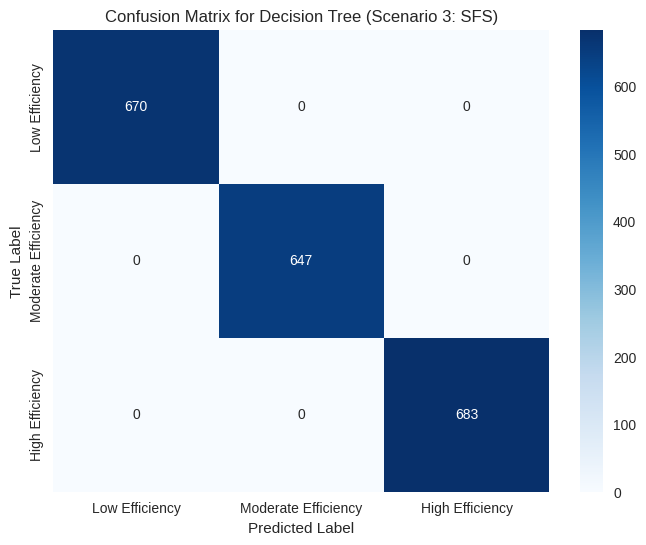

In [ ]:
cm_dt_sfs = confusion_matrix(y_test_sfs, y_pred_test_dt_sfs)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_sfs, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Efficiency', 'Moderate Efficiency', 'High Efficiency'],
            yticklabels=['Low Efficiency', 'Moderate Efficiency', 'High Efficiency'])
plt.title('Confusion Matrix for Decision Tree (Scenario 3: SFS)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

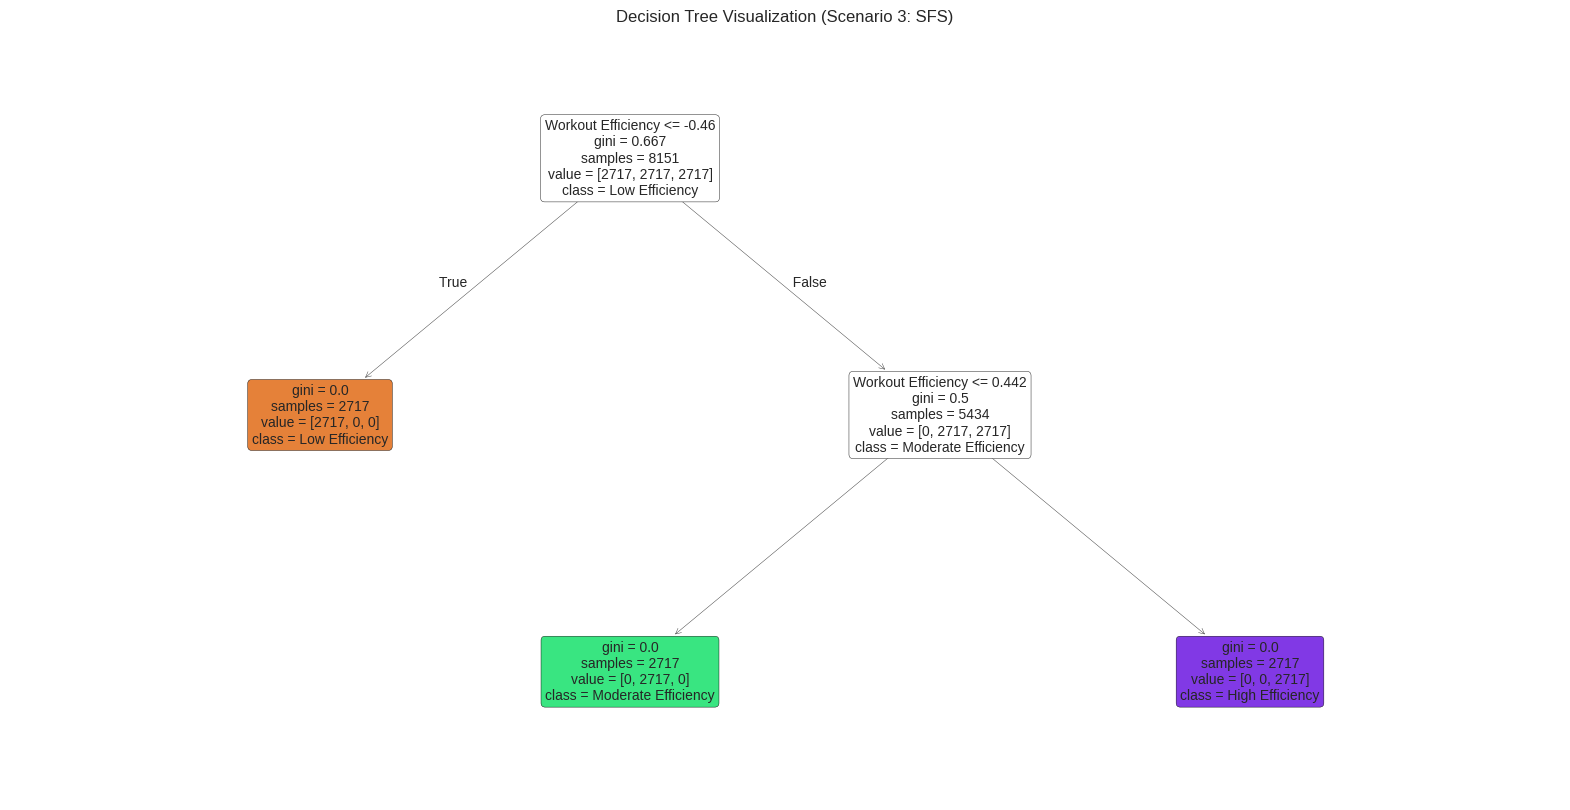

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model_sfs, feature_names=X_sfs.columns,
          class_names=['Low Efficiency', 'Moderate Efficiency', 'High Efficiency'],
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization (Scenario 3: SFS)')
plt.show()

In [ ]:
results_dt_sfs = X_test_sfs.copy()
results_dt_sfs['True Label'] = y_test_sfs.map({0: 'Low Efficiency', 1: 'Moderate Efficiency', 2: 'High Efficiency'})
results_dt_sfs['Predicted Label'] = y_pred_test_dt_sfs
results_dt_sfs['Predicted Label'] = results_dt_sfs['Predicted Label'].map(
    {0: 'Low Efficiency', 1: 'Moderate Efficiency', 2: 'High Efficiency'})
results_dt_sfs['Correct'] = results_dt_sfs['True Label'] == results_dt_sfs['Predicted Label']

# Inverse transform for display
results_dt_sfs_display = results_dt_sfs.copy()


# Sample correct predictions
correct_dt_sfs = results_dt_sfs_display[results_dt_sfs_display['Correct']].sample(5)[list(set(display_columns).intersection(selected_features_sfs)) + ['True Label', 'Predicted Label']]

# Sample incorrect predictions with error handling
incorrect_samples_sfs_dt = results_dt_sfs_display[~results_dt_sfs_display['Correct']]
if len(incorrect_samples_sfs_dt) == 0:
    print("\nNo incorrect predictions found for Decision Tree (SFS). All test samples were classified correctly.")
    incorrect_dt_sfs = pd.DataFrame(columns=list(set(display_columns).intersection(selected_features_sfs)) + ['True Label', 'Predicted Label'])
else:
    sample_size_sfs_dt = min(5, len(incorrect_samples_sfs_dt))
    incorrect_dt_sfs = incorrect_samples_sfs_dt.sample(sample_size_sfs_dt, replace=True)[list(set(display_columns).intersection(selected_features_sfs)) + ['True Label', 'Predicted Label']]


No incorrect predictions found for Decision Tree (SFS). All test samples were classified correctly.


In [ ]:
correct_dt_sfs

,Age,Heart Rate (bpm),Weight (kg),Calories Burned,Workout Type,Height (cm),Workout Duration (mins),Workout Efficiency,Steps Taken,Gender,True Label,Predicted Label
6428,1.200383,-0.226051,1.292639,-1.347191,3,-1.334816,1.619923,-0.908960,-0.126226,2,Low Efficiency,Low Efficiency
5914,0.789572,-0.884112,-1.233498,0.905157,5,0.396454,-1.240510,1.787794,1.642409,2,High Efficiency,High Efficiency
9459,-1.100162,1.228610,-0.688645,1.189099,5,-1.542569,0.519757,0.041061,-0.427531,2,Moderate Efficiency,Moderate Efficiency
1180,0.789572,1.090071,0.747786,-0.322699,2,0.673457,-0.674710,0.378196,0.316343,0,Moderate Efficiency,Moderate Efficiency
9044,-1.346649,-0.814842,-0.044727,-1.431606,5,0.188702,-1.334810,-0.609070,1.659908,0,Low Efficiency,Low Efficiency


In [ ]:
incorrect_dt_sfs

,Age,Heart Rate (bpm),Weight (kg),Calories Burned,Workout Type,Height (cm),Workout Duration (mins),Workout Efficiency,Steps Taken,Gender,True Label,Predicted Label


<ipython-input-712-7452ea3a9125>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_dt_sfs, incorrect_count_dt_sfs], palette=['#32CD32', '#FF6347'])


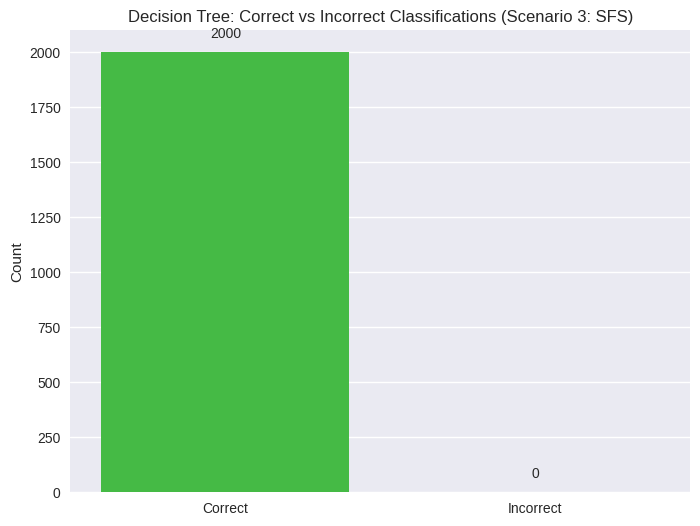

In [ ]:
correct_count_dt_sfs = results_dt_sfs['Correct'].sum()
incorrect_count_dt_sfs = len(results_dt_sfs) - correct_count_dt_sfs

plt.figure(figsize=(8, 6))
sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_dt_sfs, incorrect_count_dt_sfs], palette=['#32CD32', '#FF6347'])
plt.title('Decision Tree: Correct vs Incorrect Classifications (Scenario 3: SFS)')
plt.ylabel('Count')
for i, count in enumerate([correct_count_dt_sfs, incorrect_count_dt_sfs]):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
plt.show()

### NB

In [ ]:
print("\nNaive Bayes Classifier (SFS):")
nb_model_sfs = GaussianNB()
nb_model_sfs.fit(X_train_sfs_resampled, y_train_sfs_resampled)
y_pred_test_nb_sfs = nb_model_sfs.predict(X_test_sfs)


Naive Bayes Classifier (SFS):


In [ ]:
print("\nClassification Report for Naive Bayes (SFS):")
print(classification_report(y_test_sfs, y_pred_test_nb_sfs))


Classification Report for Naive Bayes (SFS):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       670
           1       0.92      0.95      0.93       647
           2       0.98      0.96      0.97       683

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



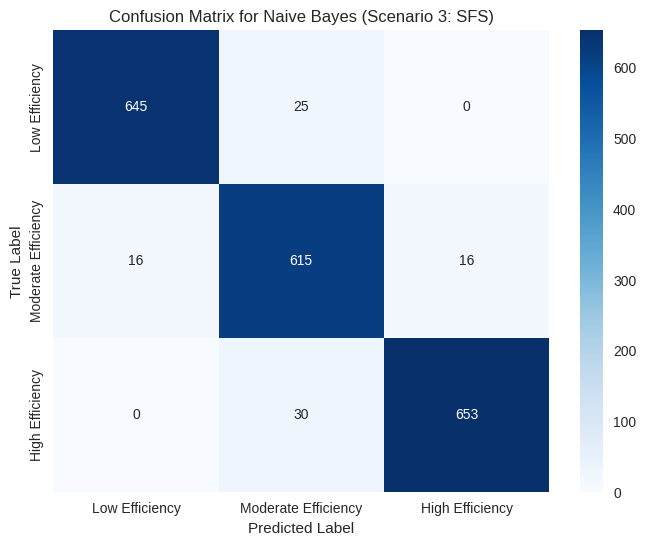

In [ ]:
cm_nb_sfs = confusion_matrix(y_test_sfs, y_pred_test_nb_sfs)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_sfs, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Efficiency', 'Moderate Efficiency', 'High Efficiency'],
            yticklabels=['Low Efficiency', 'Moderate Efficiency', 'High Efficiency'])
plt.title('Confusion Matrix for Naive Bayes (Scenario 3: SFS)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Correct and Incorrect Predictions for Naive Bayes
results_nb_sfs = X_test_sfs.copy()
results_nb_sfs['True Label'] = y_test_sfs.map({0: 'Low Efficiency', 1: 'Moderate Efficiency', 2: 'High Efficiency'})
results_nb_sfs['Predicted Label'] = y_pred_test_nb_sfs
results_nb_sfs['Predicted Label'] = results_nb_sfs['Predicted Label'].map(
    {0: 'Low Efficiency', 1: 'Moderate Efficiency', 2: 'High Efficiency'})
results_nb_sfs['Correct'] = results_nb_sfs['True Label'] == results_nb_sfs['Predicted Label']

# Tambahkan probabilitas prediksi untuk Naive Bayes
y_pred_prob_nb_sfs = nb_model_sfs.predict_proba(X_test_sfs)

# Tambahkan probabilitas ke results_nb_sfs_display
results_nb_sfs_display = results_nb_sfs.copy()
results_nb_sfs_display['Prob_Low'] = y_pred_prob_nb_sfs[:, 0]
results_nb_sfs_display['Prob_Moderate'] = y_pred_prob_nb_sfs[:, 1]
results_nb_sfs_display['Prob_High'] = y_pred_prob_nb_sfs[:, 2]


# Sample correct predictions dengan probabilitas
correct_nb_sfs = results_nb_sfs_display[results_nb_sfs_display['Correct']].sample(5, random_state=42)[list(set(display_columns).intersection(selected_features_sfs)) + ['True Label', 'Predicted Label', 'Prob_Low', 'Prob_Moderate', 'Prob_High']]

# Sample incorrect predictions dengan probabilitas
incorrect_samples_sfs_nb = results_nb_sfs_display[~results_nb_sfs_display['Correct']]
if len(incorrect_samples_sfs_nb) == 0:
    print("\nNo incorrect predictions found for Naive Bayes (SFS). All test samples were classified correctly.")
    incorrect_nb_sfs = pd.DataFrame(columns=list(set(display_columns).intersection(selected_features_sfs)) + ['True Label', 'Predicted Label', 'Prob_Low', 'Prob_Moderate', 'Prob_High'])
else:
    sample_size_sfs_nb = min(5, len(incorrect_samples_sfs_nb))
    incorrect_nb_sfs = incorrect_samples_sfs_nb.sample(sample_size_sfs_nb, random_state=42, replace=True)[list(set(display_columns).intersection(selected_features_sfs)) + ['True Label', 'Predicted Label', 'Prob_Low', 'Prob_Moderate', 'Prob_High']]

In [ ]:
correct_nb_sfs

,Age,Heart Rate (bpm),Weight (kg),Calories Burned,Workout Type,Height (cm),Workout Duration (mins),Workout Efficiency,Steps Taken,Gender,True Label,Predicted Label,Prob_Low,Prob_Moderate,Prob_High
2531,-1.346649,-1.368999,0.698254,0.283555,5,-0.226803,0.865523,-0.742300,-0.603975,1,Low Efficiency,Low Efficiency,9.191289e-01,8.038136e-02,0.000490
7216,1.693357,0.916897,1.243107,0.690282,2,1.435216,1.682790,2.031397,1.280589,1,High Efficiency,High Efficiency,8.532718e-12,2.677051e-14,1.000000
7364,1.364708,-1.126555,-0.738177,0.195303,1,0.257952,0.614057,0.330347,1.030505,1,Moderate Efficiency,Moderate Efficiency,1.111412e-03,6.834141e-01,0.315474
4016,0.378760,-1.438268,0.549658,0.110888,2,0.673457,-0.046044,-0.024219,0.920956,2,Moderate Efficiency,Moderate Efficiency,6.966941e-03,9.637228e-01,0.029310
4058,-0.278539,1.436419,0.648722,1.641871,4,1.296715,-0.611844,0.499016,-0.989856,1,High Efficiency,High Efficiency,7.376198e-06,2.086556e-01,0.791337


In [ ]:
incorrect_nb_sfs

,Age,Heart Rate (bpm),Weight (kg),Calories Burned,Workout Type,Height (cm),Workout Duration (mins),Workout Efficiency,Steps Taken,Gender,True Label,Predicted Label,Prob_Low,Prob_Moderate,Prob_High
4048,1.036059,0.293471,-1.431626,0.820742,5,-0.642308,0.236857,0.389083,0.171250,2,Moderate Efficiency,High Efficiency,0.000189,0.377349,0.622462
5741,0.953896,1.090071,1.441236,0.375644,0,0.119451,0.739790,-0.522935,-1.199839,2,Low Efficiency,Moderate Efficiency,0.340816,0.656532,0.002652
3143,0.789572,1.574958,1.044979,-0.840701,5,-0.503807,-1.303377,0.465408,1.395059,2,High Efficiency,Moderate Efficiency,0.004193,0.863017,0.132790
763,1.200383,0.016393,-0.193324,0.705630,5,0.811959,-1.303377,0.327620,0.882678,2,Moderate Efficiency,High Efficiency,0.000177,0.438398,0.561425
4504,0.460922,-0.537764,-1.431626,-0.522226,5,-0.988562,0.802657,-0.495690,1.149167,0,Low Efficiency,Moderate Efficiency,0.401048,0.597687,0.001264


<ipython-input-719-29e9f7311a53>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_nb_sfs, incorrect_count_nb_sfs], palette=['#32CD32', '#FF6347'])


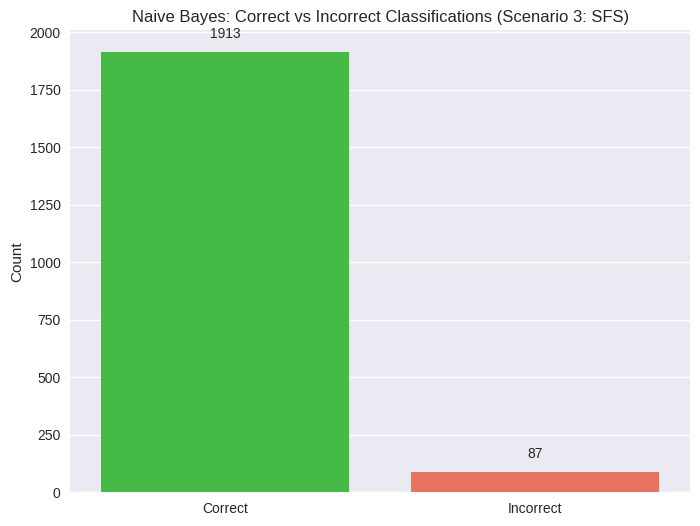

In [ ]:
correct_count_nb_sfs = results_nb_sfs['Correct'].sum()
incorrect_count_nb_sfs = len(results_nb_sfs) - correct_count_nb_sfs

plt.figure(figsize=(8, 6))
sns.barplot(x=['Correct', 'Incorrect'], y=[correct_count_nb_sfs, incorrect_count_nb_sfs], palette=['#32CD32', '#FF6347'])
plt.title('Naive Bayes: Correct vs Incorrect Classifications (Scenario 3: SFS)')
plt.ylabel('Count')
for i, count in enumerate([correct_count_nb_sfs, incorrect_count_nb_sfs]):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')
plt.show()